# Gathering Data

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
twitter_archive_enh = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
# only ran once when first downloading the tsv file

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as f:
    f.write(response.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [135]:
# only ran once when first querying for each tweet's json from the tweepy api

import tweepy
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# only ran once when creating the tweet_json.txt

count = 0
err = {}
start = timer()

with open('tweet_json.txt', mode='w') as output: 
    for tweet_id in twitter_archive_enh.tweet_id.values: 
        count += 1
        print(str(count) + ". " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('success')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError as e:
            print('fail')
            err[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(err)

1. 892420643555336193
success
2. 892177421306343426
success
3. 891815181378084864
success
4. 891689557279858688
success
5. 891327558926688256
success
6. 891087950875897856
success
7. 890971913173991426
success
8. 890729181411237888
success
9. 890609185150312448
success
10. 890240255349198849
success
11. 890006608113172480
success
12. 889880896479866881
success
13. 889665388333682689
success
14. 889638837579907072
success
15. 889531135344209921
success
16. 889278841981685760
success
17. 888917238123831296
success
18. 888804989199671297
success
19. 888554962724278272
success
20. 888202515573088257
fail
21. 888078434458587136
success
22. 887705289381826560
success
23. 887517139158093824
success
24. 887473957103951883
success
25. 887343217045368832
success
26. 887101392804085760
success
27. 886983233522544640
success
28. 886736880519319552
success
29. 886680336477933568
success
30. 886366144734445568
success
31. 886267009285017600
success
32. 886258384151887873
success
33. 8860541600590725

success
263. 842765311967449089
success
264. 842535590457499648
success
265. 842163532590374912
success
266. 842115215311396866
success
267. 841833993020538882
success
268. 841680585030541313
success
269. 841439858740625411
success
270. 841320156043304961
success
271. 841314665196081154
success
272. 841077006473256960
success
273. 840761248237133825
success
274. 840728873075638272
success
275. 840698636975636481
success
276. 840696689258311684
success
277. 840632337062862849
success
278. 840370681858686976
success
279. 840268004936019968
success
280. 839990271299457024
success
281. 839549326359670784
success
282. 839290600511926273
success
283. 839239871831150596
success
284. 838952994649550848
success
285. 838921590096166913
success
286. 838916489579200512
success
287. 838831947270979586
success
288. 838561493054533637
success
289. 838476387338051585
success
290. 838201503651401729
success
291. 838150277551247360
success
292. 838085839343206401
success
293. 838083903487373313
success


success
520. 810284430598270976
success
521. 810254108431155201
success
522. 809920764300447744
success
523. 809808892968534016
success
524. 809448704142938112
success
525. 809220051211603969
success
526. 809084759137812480
success
527. 808838249661788160
success
528. 808733504066486276
success
529. 808501579447930884
success
530. 808344865868283904
success
531. 808134635716833280
success
532. 808106460588765185
success
533. 808001312164028416
success
534. 807621403335917568
success
535. 807106840509214720
success
536. 807059379405148160
success
537. 807010152071229440
success
538. 806629075125202948
success
539. 806620845233815552
success
540. 806576416489959424
success
541. 806542213899489280
success
542. 806242860592926720
success
543. 806219024703037440
success
544. 805958939288408065
success
545. 805932879469572096
success
546. 805826884734976000
success
547. 805823200554876929
success
548. 805520635690676224
success
549. 805487436403003392
success
550. 805207613751304193
success


success
778. 776088319444877312
success
779. 775898661951791106
success
780. 775842724423557120
success
781. 775733305207554048
success
782. 775729183532220416
success
783. 775364825476165632
success
784. 775350846108426240
success
785. 775096608509886464
fail
786. 775085132600442880
success
787. 774757898236878852
success
788. 774639387460112384
success
789. 774314403806253056
success
790. 773985732834758656
success
791. 773922284943896577
success
792. 773704687002451968
success
793. 773670353721753600
success
794. 773547596996571136
success
795. 773336787167145985
success
796. 773308824254029826
success
797. 773247561583001600
success
798. 773191612633579521
success
799. 772877495989305348
success
800. 772826264096874500
success
801. 772615324260794368
success
802. 772581559778025472
success
803. 772193107915964416
success
804. 772152991789019136
success
805. 772117678702071809
success
806. 772114945936949249
success
807. 772102971039580160
success
808. 771908950375665664
success
809

success
1033. 745314880350101504
success
1034. 745074613265149952
success
1035. 745057283344719872
success
1036. 744995568523612160
success
1037. 744971049620602880
success
1038. 744709971296780288
success
1039. 744334592493166593
success
1040. 744234799360020481
success
1041. 744223424764059648
success
1042. 743980027717509120
success
1043. 743895849529389061
success
1044. 743835915802583040
success
1045. 743609206067040256
success
1046. 743595368194129920
success
1047. 743545585370791937
success
1048. 743510151680958465
success
1049. 743253157753532416
success
1050. 743222593470234624
success
1051. 743210557239623680
success
1052. 742534281772302336
success
1053. 742528092657332225
success
1054. 742465774154047488
success
1055. 742423170473463808
success
1056. 742385895052087300
success
1057. 742161199639494656
success
1058. 742150209887731712
success
1059. 741793263812808706
success
1060. 741743634094141440
success
1061. 741438259667034112
success
1062. 741303864243200000
success
10

success
1283. 708738143638450176
success
1284. 708711088997666817
success
1285. 708479650088034305
success
1286. 708469915515297792
success
1287. 708400866336894977
success
1288. 708356463048204288
success
1289. 708349470027751425
success
1290. 708149363256774660
success
1291. 708130923141795840
success
1292. 708119489313951744
success
1293. 708109389455101952
success
1294. 708026248782585858
success
1295. 707995814724026368
success
1296. 707983188426153984
success
1297. 707969809498152960
success
1298. 707776935007539200
success
1299. 707741517457260545
success
1300. 707738799544082433
success
1301. 707693576495472641
success
1302. 707629649552134146
success
1303. 707610948723478529
success
1304. 707420581654872064
success
1305. 707411934438625280
success
1306. 707387676719185920
success
1307. 707377100785885184
success
1308. 707315916783140866
success
1309. 707297311098011648
success
1310. 707059547140169728
success
1311. 707038192327901184
success
1312. 707021089608753152
success
13

success
1533. 690005060500217858
success
1534. 689999384604450816
success
1535. 689993469801164801
success
1536. 689977555533848577
success
1537. 689905486972461056
success
1538. 689877686181715968
success
1539. 689835978131935233
success
1540. 689661964914655233
success
1541. 689659372465688576
success
1542. 689623661272240129
success
1543. 689599056876867584
success
1544. 689557536375177216
success
1545. 689517482558820352
success
1546. 689289219123089408
success
1547. 689283819090870273
success
1548. 689280876073582592
success
1549. 689275259254616065
success
1550. 689255633275777024
success
1551. 689154315265683456
success
1552. 689143371370250240
success
1553. 688916208532455424
success
1554. 688908934925697024
success
1555. 688898160958271489
success
1556. 688894073864884227
success
1557. 688828561667567616
success
1558. 688804835492233216
success
1559. 688789766343622656
success
1560. 688547210804498433
success
1561. 688519176466644993
success
1562. 688385280030670848
success
15

success
1782. 677698403548192770
success
1783. 677687604918272002
success
1784. 677673981332312066
success
1785. 677662372920729601
success
1786. 677644091929329666
success
1787. 677573743309385728
success
1788. 677565715327688705
success
1789. 677557565589463040
success
1790. 677547928504967168
success
1791. 677530072887205888
success
1792. 677335745548390400
success
1793. 677334615166730240
success
1794. 677331501395156992
success
1795. 677328882937298944
success
1796. 677314812125323265
success
1797. 677301033169788928
success
1798. 677269281705472000
success
1799. 677228873407442944
success
1800. 677187300187611136
success
1801. 676975532580409345
success
1802. 676957860086095872
success
1803. 676949632774234114
success
1804. 676948236477857792
success
1805. 676946864479084545
success
1806. 676942428000112642
success
1807. 676936541936185344
success
1808. 676916996760600576
success
1809. 676897532954456065
success
1810. 676864501615042560
success
1811. 676821958043033607
success
18

success
2031. 671789708968640512
success
2032. 671768281401958400
success
2033. 671763349865160704
success
2034. 671744970634719232
success
2035. 671743150407421952
success
2036. 671735591348891648
success
2037. 671729906628341761
success
2038. 671561002136281088
success
2039. 671550332464455680
success
2040. 671547767500775424
success
2041. 671544874165002241
success
2042. 671542985629241344
success
2043. 671538301157904385
success
2044. 671536543010570240
success
2045. 671533943490011136
success
2046. 671528761649688577
success
2047. 671520732782923777
success
2048. 671518598289059840
success
2049. 671511350426865664
success
2050. 671504605491109889
success
2051. 671497587707535361
success
2052. 671488513339211776
success
2053. 671486386088865792
success
2054. 671485057807351808
success
2055. 671390180817915904
success
2056. 671362598324076544
success
2057. 671357843010908160
success
2058. 671355857343524864
success
2059. 671347597085433856
success
2060. 671186162933985280
success
20

success
2280. 667405339315146752
success
2281. 667393430834667520
success
2282. 667369227918143488
success
2283. 667211855547486208
success
2284. 667200525029539841
success
2285. 667192066997374976
success
2286. 667188689915760640
success
2287. 667182792070062081
success
2288. 667177989038297088
success
2289. 667176164155375616
success
2290. 667174963120574464
success
2291. 667171260800061440
success
2292. 667165590075940865
success
2293. 667160273090932737
success
2294. 667152164079423490
success
2295. 667138269671505920
success
2296. 667119796878725120
success
2297. 667090893657276420
success
2298. 667073648344346624
success
2299. 667070482143944705
success
2300. 667065535570550784
success
2301. 667062181243039745
success
2302. 667044094246576128
success
2303. 667012601033924608
success
2304. 666996132027977728
success
2305. 666983947667116034
success
2306. 666837028449972224
success
2307. 666835007768551424
success
2308. 666826780179869698
success
2309. 666817836334096384
success
23

In [4]:
# construct the third dataframe from tweet_json.txt with four columns: tweet_id, retweet_count, favorite_count, display_text_range

df_list = []
with open('tweet_json.txt', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line[:-1])
        df_list.append({'tweet_id': data['id_str'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'display_text_range': data['display_text_range']})
df_tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])
df_tweet_json.head()

tweet_id  retweet_count  favorite_count display_text_range
0  892420643555336193           7977           37224            [0, 85]
1  892177421306343426           5922           32018           [0, 138]
2  891815181378084864           3912           24114           [0, 121]
3  891689557279858688           8123           40550            [0, 79]
4  891327558926688256           8809           38780           [0, 138]

# Assessing Data

In [5]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null object
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(2), object(2)
memory usage: 73.0+ KB


In [6]:
df_tweet_json.describe()

retweet_count  favorite_count
count    2333.000000     2333.000000
mean     2801.825975     7761.279468
std      4742.667140    12048.849573
min         1.000000        0.000000
25%       562.000000     1348.000000
50%      1309.000000     3379.000000
75%      3263.000000     9524.000000
max     80515.000000   160866.000000

In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [9]:
twitter_archive_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive_enh.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [11]:
twitter_archive_enh.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1196  717047459982213120                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
1624  684880619965411328                    NaN                  NaN   
302   836648853927522308                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   

                      timestamp  \
1196  2016-04-04 17:53:31 +0000   
38    2017-07-12 00:01:00 +0000   
1624  2016-01-06 23:33:58 +0000   
302   2017-02-28 18:46:45 +0000   
51    2017-07-04 16:01:23 +0000   

                                                 source  \
1196  <a href="http://twitter.com/download/iphone" r...   
38    <a href="http://twitter.com/download/iphone" r...   
1624  <a href="http://twitter.com/download/iphone" r...   
302   <a href="http://twitter.com/download/iphone" r...   
51    <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1196  This is Flávio (pronounced Baxter). He's a Ben...                  NaN   
38    This is Earl. He found a hat. Nervous about wh...                  NaN   
1624  Here we have a basking dino pupper. Looks powe...                  NaN   
302   RT @SchafeBacon2016: @dog_rates Slightly distu...         8.366481e+17   
51    This is Alfy. You're witnessing his first wate...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1196                       NaN                        NaN   
38                         NaN                        NaN   
1624                       NaN                        NaN   
302               7.124572e+17  2017-02-28 18:43:57 +0000   
51                         NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1196  https://twitter.com/dog_rates/status/717047459...                12   
38    https://twitter.com/dog_rates/status/884925521...                12   
1624  https://twitter.com/dog_rates/status/684880619...                 5   
302   https://twitter.com/SchafeBacon2016/status/836...                11   
51    https://twitter.com/dog_rates/status/882268110...                13   

      rating_denominator    name doggo floofer  pupper puppo  
1196                  10  Flávio  None    None    None  None  
38                    10    Earl  None    None    None  None  
1624                  10    None  None    None  pupper  None  
302                   10    None  None    None    None  None  
51                    10    Alfy  None    None    None  None

In [12]:
# Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.

twitter_archive_enh[twitter_archive_enh.retweeted_status_id.notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
...                  ...                    ...                  ...   
784   775096608509886464                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   
800   772615324260794368                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   
815   771004394259247104                    NaN                  NaN   
818   770743923962707968                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
826   769335591808995329                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
833   768554158521745409                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   
885   760153949710192640                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
908   757729163776290825                    NaN                  NaN   
911   757597904299253760                    NaN                  NaN   
926   754874841593970688                    NaN                  NaN   
937   753298634498793472                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
949   752309394570878976                    NaN         

Multiple dog stages are present with some records

In [13]:
twitter_archive_enh[(twitter_archive_enh.doggo != 'None') & (twitter_archive_enh.floofer != 'None')].shape

(1, 17)

In [14]:
twitter_archive_enh[(twitter_archive_enh.doggo != 'None') & (twitter_archive_enh.pupper != 'None')].shape

(12, 17)

In [15]:
twitter_archive_enh[(twitter_archive_enh.doggo != 'None') & (twitter_archive_enh.puppo != 'None')].shape

(1, 17)

In [16]:
# Assess column 'source' in twitter_archive_enh

twitter_archive_enh.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# Assess column 'name'

twitter_archive_enh.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
an             7
Daisy          7
Bailey         7
Toby           7
Koda           6
Oscar          6
Bella          6
Jack           6
Stanley        6
Leo            6
Dave           6
Milo           6
Rusty          6
Scout          6
Jax            6
Sammy          5
            ... 
Berb           1
Banditt        1
Kellogg        1
Richie         1
Dook           1
my             1
Kawhi          1
Kendall        1
Sprinkles      1
Pippin         1
Tater          1
Tycho          1
Jerome         1
Torque         1
Stu            1
Sparky         1
Steve          1
Shnuggles      1
Mitch          1
Kara           1
Link           1
Anthony        1
Ron            1
Autumn         1
Mya            1
Stark          1
Taco           1
Ole           

In [18]:
# Assess column 'text'

print(str(twitter_archive_enh.tweet_id[0]) + " " + twitter_archive_enh.text[0] + '\n')
print(str(twitter_archive_enh.tweet_id[1]) + " " + twitter_archive_enh.text[1] + '\n')
print(str(twitter_archive_enh.tweet_id[2]) + " " + twitter_archive_enh.text[2] + '\n')
print(str(twitter_archive_enh.tweet_id[19]) + " " + twitter_archive_enh.text[19] + '\n')
print(str(twitter_archive_enh.tweet_id[32]) + " " + twitter_archive_enh.text[32] + '\n')

892420643555336193 This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU

892177421306343426 This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

891815181378084864 This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

888202515573088257 RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX

886054160059072513 RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo



In [19]:
# Assess columns 'rating_numerator' and 'rating_denominator' by extracting all matched patterns from 'text'

matchall = twitter_archive_enh.text.str.extractall(r"(\d+\.?\d*\/\d+)").unstack()
matchall.columns = matchall.columns.droplevel()
matchall[matchall[1].notnull()]

match       0      1      2
55      17/10  13/10    NaN
313    960/00  13/10    NaN
561     12/10  11/10    NaN
766     12/10  11/10    NaN
784      9/11  14/10    NaN
860      8/10  11/10    NaN
1007    10/10   7/10    NaN
1068     9/11  14/10    NaN
1165     4/20  13/10    NaN
1202    50/50  11/10    NaN
1222    10/10   8/10    NaN
1359     9/10   2/10    NaN
1459     4/10  13/10    NaN
1465    10/10   5/10    NaN
1508     5/10  10/10    NaN
1525    10/10   6/10    NaN
1538    11/10  10/10    NaN
1662     7/11  10/10    NaN
1795    10/10  11/10    NaN
1832    10/10   7/10    NaN
1897    10/10   4/10    NaN
1901     5/10   8/10    NaN
1970     8/10  11/10    NaN
2010    10/10   7/10  12/10
2064    11/10   8/10    NaN
2113    11/10   8/10    NaN
2177    10/10   7/10    NaN
2216     8/10   1/10    NaN
2263    10/10   4/10    NaN
2272     7/10   8/10    NaN
2298    10/10  10/10    NaN
2306    10/10  10/10    NaN
2335      1/2   9/10    NaN

In [20]:
# example row with incorrect rating numerator and denominator due to multiple matches of the pattern

twitter_archive_enh.text.iloc[1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [21]:
twitter_archive_enh[['rating_numerator', 'rating_denominator']].iloc[1068]

rating_numerator       9
rating_denominator    11
Name: 1068, dtype: int64

In [22]:
# example row with incorrectt rating numerator with decimal points

matchall.iloc[340]

match
0    9.75/10
1        NaN
2        NaN
Name: 340, dtype: object

In [23]:
twitter_archive_enh[['rating_numerator', 'rating_denominator']].iloc[340]

rating_numerator      75
rating_denominator    10
Name: 340, dtype: int64

## Tidiness:

- Variable dog stage are in 4 columns instead of one in `twitter_archive_enh`.
- All three tables/dataframes are describing each tweet's info thus should be combined to one.

## Quality:

Corresponds to the tidiness issues:
- Some records have more than one dog stage in `twitter_archive_enh`.
- 'None' values in dog stage columns should be 'NaN' in `twitter_archive_enh`.
- Fewer rows/records are available in `image_predictions` and `df_tweet_json` when merging the three.
- Duplicated 'tweet_id' column.

Other qulity issues:

- `twitter_archive_enh` contains retweets, not all are original tweets.
- `twitter_archive_enh` has unused columns, i.e. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
- Incorrect dtype for `twitter_archive_enh`'s 'tweet_id', 'timestamp', 'source', 'dog_stage' and image_predictions' 'tweet_id'.
- Column 'source' formatting issue in `twitter_archive_enh`.
- Field 'name' contains incorrect values like 'a', 'an', 'the', starting with non-capitalized letter in `twitter_archive_enh`.
- `twitter_archive_enh` 'text' has non-displayed texts, i.e. '@dog_rates:', 'https://t.co/WxwJmvjfxo'.
- Some rating numerators and denominators are incorrect in `twitter_archive_enh`.

# Cleaning Data

In [24]:
twitter_clean = twitter_archive_enh.copy()
predict_clean = image_predictions.copy()
tweet_json_clean = df_tweet_json.copy()

- **`twitter_archive_enh` contains retweets, not all are original tweets.**

**Define**: According to [twitter api doc](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object), retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. Original tweets can be filtered out by a boolean arrary mask where 'retweeted_status_id' is null.  

In [25]:
# Code

twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

In [26]:
# Test

print(twitter_clean.shape)
twitter_clean.retweeted_status_id.value_counts()

(2175, 17)


Series([], Name: retweeted_status_id, dtype: int64)

- **`twitter_archive_enh` has unused columns, i.e. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.**

**Define**: Drop unused columns.

In [27]:
# Code

twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [28]:
# Test

twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

- **Incorrect dtype for `twitter_archive_enh`'s 'tweet_id', 'timestamp', 'source', 'dog_stage' and image_predictions' 'tweet_id'.**

**Define**: Cast the field types to string, datetime, category using [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype) and [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime).

In [29]:
# Code ('source' and 'dog_stage' will cast later)

twitter_clean = twitter_clean.astype({'tweet_id':'str'})
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
predict_clean.tweet_id = predict_clean.tweet_id.astype(str)

In [30]:
# Test

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [31]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


- **Column 'source' formatting issue in `twitter_archive_enh`.**

**Define**: Use regular expression to replace the html tags with empty string, and cast field type to category.

In [32]:
# Code

twitter_clean.source = twitter_clean.source.str.replace(r"<(?:a\b[^>]*>|/a>)", "")
twitter_clean.source = twitter_clean.source.astype('category')

In [33]:
# Test

print(twitter_clean.source.dtype)
twitter_clean.source.value_counts()

category


Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

- **Field 'name' contains incorrect values like 'a', 'an', 'the', starting with non-capitalized letter in `twitter_archive_enh`.**

**Define**: Use boolean array mask to filter out all non-capitalized names and assign to null, update "None" names to null as well. 

In [34]:
# Code

twitter_clean.name[twitter_clean.name.str.match(r"[a-z]+")] = np.nan
twitter_clean.name[twitter_clean.name == "None"] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
# Test

twitter_clean.name.value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Koda          6
Jax           6
Oscar         6
Bella         6
Bailey        6
Bo            6
Stanley       6
Rusty         5
Scout         5
Leo           5
Dave          5
Milo          5
Buddy         5
Chester       5
Louis         5
Bentley       5
Alfie         4
Maggie        4
Dexter        4
             ..
Tom           1
Astrid        1
Crumpet       1
Ginger        1
Rudy          1
Yoda          1
Combo         1
Finnegus      1
Duddles       1
Ralpher       1
Brudge        1
Mollie        1
Mingus        1
Godi          1
Maisey        1
Bonaparte     1
Chompsky      1
Theo          1
Rhino         1
Tino          1
Bell          1
Pilot         1
Bobbay        1
Sandra        1
Evy           1
Antony        1
Dotsy         1
Tango         1
Laika         1
Stu           1
Name: name, Length: 930,

In [36]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 206.2+ KB


- **`twitter_archive_enh` 'text' has non-displayed texts, i.e. '@dog_rates:', 'https://t.co/WxwJmvjfxo'.**

**Define**: join `tweet_json_clean` with `twitter_clean`, split 'display_text_range' column into two columns 'start_index', 'end_index', then use the index columns to slice 'text' field for cleaned text. Drop the no-longer-needed index columns at the end.

In [37]:
# Code

twitter_clean = twitter_clean.merge(tweet_json_clean, how='inner', on='tweet_id')
twitter_clean.display_text_range = twitter_clean.display_text_range.astype(str)
twitter_clean['start_index'], twitter_clean['end_index'] = twitter_clean.display_text_range.str.strip(r'[]').str.split(', ').str
twitter_clean.text = twitter_clean.apply(lambda x: x['text'][int(x['start_index']):int(x['end_index'])], axis=1)
twitter_clean.drop(['display_text_range', 'start_index', 'end_index'], axis=1, inplace=True)

In [38]:
# Test

print(twitter_clean.text.iloc[0] + '\n')
print(twitter_clean.text.iloc[1] + '\n')
print(twitter_clean.text.iloc[2])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


In [39]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 14 columns):
tweet_id              2168 non-null object
timestamp             2168 non-null datetime64[ns]
source                2168 non-null category
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null int64
rating_denominator    2168 non-null int64
name                  1384 non-null object
doggo                 2168 non-null object
floofer               2168 non-null object
pupper                2168 non-null object
puppo                 2168 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
dtypes: category(1), datetime64[ns](1), int64(4), object(8)
memory usage: 239.4+ KB


- **Some rating numerators and denominators are incorrect in `twitter_archive_enh`.**

**Define**: use regular expression to extract all matching patterns from 'text', visually check the few records that have more than one matches to record the correct ratings. Join the new extracted rating dataframe with `twitter_clean`, split the column to update the numerators and denominators with the true derived ratings to include decimal point ratings, etc.

In [40]:
# Code: extract all matched patterns from 'text', visually check the few that have multiple matches to pick the correct ratings.

matchall = twitter_clean.text.str.extractall(r"(\d+\.?\d*\/\d+)").unstack()
matchall.columns = matchall.columns.droplevel()
matchall['final'] = matchall[0]
matchall.loc[matchall.index.isin([52, 260, 884, 981, 1018, 1274, 1323, 1477, 2147]), 'final'] = matchall[1]

In [41]:
# join the newly derived rating to twitter_clean, split the column to update the numerators and denominators.

twitter_clean = twitter_clean.join(matchall)
twitter_clean.rating_numerator, twitter_clean.rating_denominator = twitter_clean.final.str.split('/').str
twitter_clean.drop([0, 1, 2, 'final'], axis=1, inplace=True)
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(float)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.astype(float)
twitter_clean.sample(3)

tweet_id           timestamp               source  \
575   783695101801398276 2016-10-05 15:47:27   Twitter for iPhone   
1024  715704790270025728 2016-04-01 00:58:13  Vine - Make a Scene   
1683  675153376133427200 2015-12-11 03:21:23   Twitter for iPhone   

                                                   text  \
575   This is Loomis. He's the leader of the Kenneth...   
1024  This is Bentley. He gives kisses back. 11/10 p...   
1683  What kind of person sends in a picture without...   

                                          expanded_urls  rating_numerator  \
575   https://twitter.com/dog_rates/status/783695101...              12.0   
1024                      https://vine.co/v/ijAlDnuOD0l              11.0   
1683  https://twitter.com/dog_rates/status/675153376...               1.0   

      rating_denominator     name doggo floofer pupper puppo  retweet_count  \
575                 10.0   Loomis  None    None   None  None           3382   
1024                10.0  Bentley  None    None   None  None            575   
1683                10.0      NaN  None    None   None  None           2605   

      favorite_count  
575            10925  
1024            2866  
1683            6303

In [42]:
# Test

twitter_clean.describe()

rating_numerator  rating_denominator  retweet_count  favorite_count
count       2168.000000         2168.000000    2168.000000     2168.000000
mean          12.741365           10.478782    2529.977860     8351.967251
std           43.225250            6.969941    4503.394956    12300.122413
min            0.000000            7.000000       1.000000       51.000000
25%           10.000000           10.000000     546.000000     1776.250000
50%           11.000000           10.000000    1210.000000     3763.000000
75%           12.000000           10.000000    2870.250000    10359.500000
max         1776.000000          170.000000   80515.000000   160866.000000

In [43]:
twitter_clean.rating_numerator.value_counts()

12.00      498
10.00      443
11.00      427
13.00      307
9.00       156
8.00        98
7.00        53
14.00       44
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         7
0.00         2
420.00       2
84.00        1
24.00        1
80.00        1
15.00        1
13.50        1
143.00       1
60.00        1
666.00       1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
99.00        1
121.00       1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
Name: rating_numerator, dtype: int64

- **Some records have more than one dog stage in twitter_archive_enh.**
- **'None' values in dog stage columns should be 'NaN' in twitter_archive_enh.**
- **Variable dog stage are in 4 columns instead of one in twitter_archive_enh.**

**Define**: First set all rows with multiple dog stages to 'None', change all 'None' values to empty string, add a new 'dog_stage' field concatenating all four stage field values, set record with no stage to null, drop the no-longer-needed columns and finally update the stage column to category type.

In [44]:
# Code

twitter_clean.loc[(twitter_clean.doggo != 'None') & (twitter_clean.floofer != 'None'), ['doggo', 'floofer']] = 'None'
twitter_clean.loc[(twitter_clean.doggo != 'None') & (twitter_clean.pupper != 'None'), ['doggo', 'pupper']] = 'None'
twitter_clean.loc[(twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None'), ['doggo', 'puppo']] = 'None'

twitter_clean.doggo[twitter_clean.doggo == 'None'] = ''
twitter_clean.floofer[twitter_clean.floofer == 'None'] = ''
twitter_clean.pupper[twitter_clean.pupper == 'None'] = ''
twitter_clean.puppo[twitter_clean.puppo == 'None'] = ''

twitter_clean['dog_stage'] = twitter_clean.loc[:, 'doggo':'puppo'].apply(lambda x: ''.join(x), axis=1)

twitter_clean.dog_stage[twitter_clean.dog_stage == ''] = np.nan
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
twitter_clean.dog_stage = twitter_clean.dog_stage.astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

In [45]:
# Test

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
tweet_id              2168 non-null object
timestamp             2168 non-null datetime64[ns]
source                2168 non-null category
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null float64
rating_denominator    2168 non-null float64
name                  1384 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
dog_stage             331 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 254.0+ KB


- **All three tables/dataframes are describing each tweet's info thus should be combined to one.**
- **Fewer rows/records are available in image_predictions and df_tweet_json when merging the three.**
- **Duplicated 'tweet_id' column.**

**Define**: merge `image_predictions` df with `twitter_clean`, the master dataframe.

In [46]:
# Code

twitter_clean = twitter_clean.merge(predict_clean, how='inner', on='tweet_id')

In [47]:
# Test

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 22 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null category
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1343 non-null object
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
dog_stage             294 non-null category
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               198

In [48]:
twitter_clean.sample(3)

tweet_id           timestamp              source  \
1148  694905863685980160 2016-02-03 15:30:43  Twitter for iPhone   
1400  679111216690831360 2015-12-22 01:28:25  Twitter for iPhone   
1569  674038233588723717 2015-12-08 01:30:12  Twitter for iPhone   

                                                   text  \
1148  This is Archie. He's a Bisquick Taj Mapaw. Too...   
1400  This is officially the greatest yawn of all ti...   
1569  This is Kaiya. She's an aspiring shoe model. 1...   

                                          expanded_urls  rating_numerator  \
1148  https://twitter.com/dog_rates/status/694905863...              10.0   
1400  https://twitter.com/dog_rates/status/679111216...              12.0   
1569  https://twitter.com/dog_rates/status/674038233...              12.0   

      rating_denominator    name  retweet_count  favorite_count  ...    \
1148                10.0  Archie            957            2820  ...     
1400                10.0     NaN           2620            6093  ...     
1569                10.0   Kaiya            414            1099  ...     

     img_num          p1   p1_conf p1_dog                  p2   p2_conf  \
1148       1     bow_tie  0.449268  False            fur_coat  0.139099   
1400       1      kelpie  0.189423   True              beagle  0.121988   
1569       1  Eskimo_dog  0.358459   True  Norwegian_elkhound  0.206963   

     p2_dog                   p3   p3_conf p3_dog  
1148  False  black-footed_ferret  0.082232  False  
1400   True               basset  0.121171   True  
1569   True             malamute  0.148236   True  

[3 rows x 22 columns]

In [50]:
# store clean data into a csv.

twitter_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing and Visualizing Data

### 20 Most tweeted dog breeds and their received favorites

In [3]:
# Use the most likely predicted breed in 'p1' that are dogs to aggregate tweet counts and their received favorites.

df = pd.read_csv('twitter_archive_master.csv')
df = df.loc[(df.p1_dog == True) & (df.p1_conf > 0.8)]
df.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
df.p1 = df.p1.str.replace('_', ' ').str.title()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 10 to 1966
Data columns (total 15 columns):
tweet_id              460 non-null int64
timestamp             460 non-null object
source                460 non-null object
text                  460 non-null object
expanded_urls         460 non-null object
rating_numerator      460 non-null float64
rating_denominator    460 non-null float64
name                  339 non-null object
retweet_count         460 non-null int64
favorite_count        460 non-null int64
dog_stage             77 non-null object
jpg_url               460 non-null object
img_num               460 non-null int64
p1                    460 non-null object
p1_conf               460 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 57.5+ KB


In [4]:
index = df.p1.value_counts().index

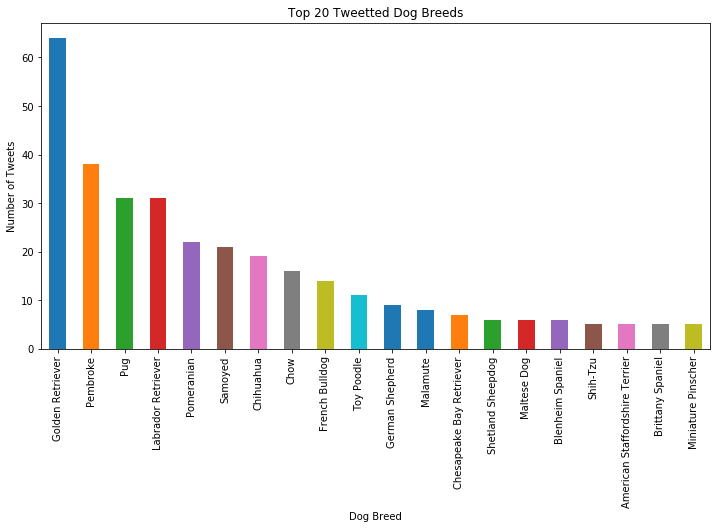

In [6]:
df.p1.value_counts()[index][:20].plot(kind='bar', figsize=(12, 6));
plt.title("Top 20 Tweetted Dog Breeds");
plt.xlabel("Dog Breed");
plt.ylabel("Number of Tweets");
plt.savefig('top_20_tweeted_breeds', bbox_inches='tight')

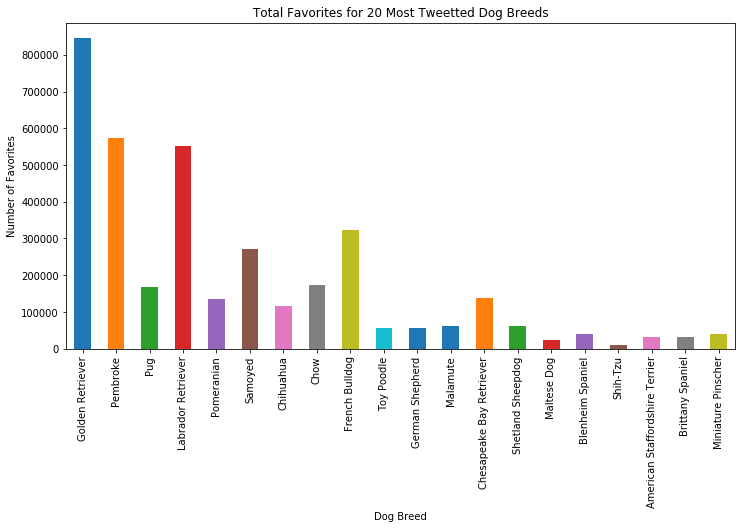

In [7]:
df.favorite_count.groupby(df.p1).sum()[index][:20].plot(kind='bar', figsize=(12, 6));
plt.title("Total Favorites for 20 Most Tweetted Dog Breeds");
plt.xlabel("Dog Breed");
plt.ylabel("Number of Favorites");
plt.savefig('fav_top_20_tweeted_breeds', bbox_inches='tight')

### Dog ratings distribution

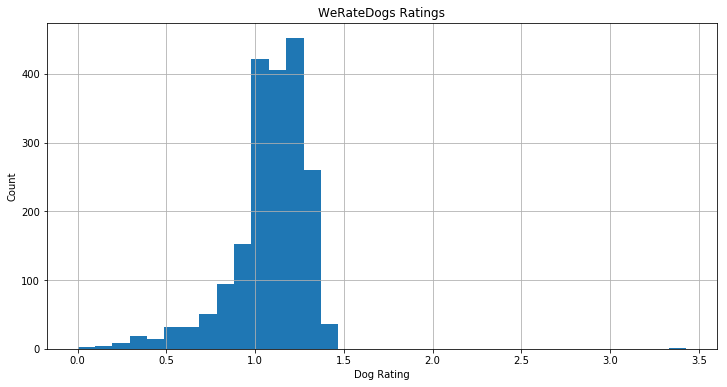

In [8]:
# calculate the ratings from 'rating_numerator'/'rating_denominator', drop a few outliers and plot its histgram.

df2 = pd.read_csv('twitter_archive_master.csv')
df2['rating'] = df2['rating_numerator']/df2['rating_denominator']
# drop two large outliers
df2 = df2[df2.rating < 40]
df2['rating'].hist(bins=35, figsize=(12, 6));
plt.title("WeRateDogs Ratings");
plt.xlabel("Dog Rating");
plt.ylabel("Count");
plt.savefig('ratings_dist', bbox_inches='tight')

### Retweet vs. Favorite

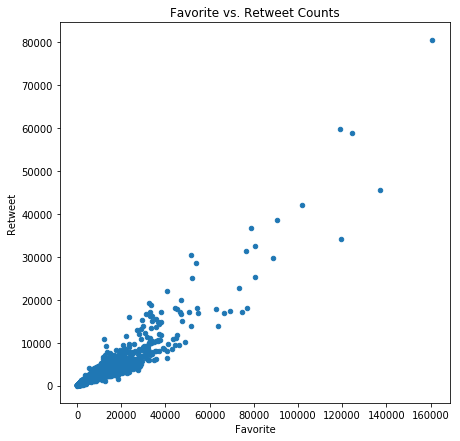

In [9]:
# scatterplot between 'favorite_count' and 'retweet_count' variables to examine their relationship.

df2.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(7, 7));
plt.title("Favorite vs. Retweet Counts");
plt.xlabel("Favorite");
plt.ylabel("Retweet");
plt.savefig('fav_retweet_scatter', bbox_inches='tight')

### Time series of total number of tweets

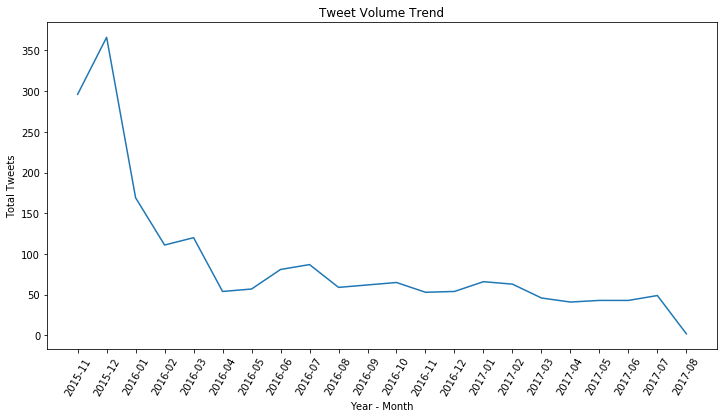

In [10]:
plt.rcParams['figure.figsize'] = 12, 6

df3 = pd.read_csv('twitter_archive_master.csv')
df3.timestamp = pd.to_datetime(df3.timestamp)
idx = df3.timestamp.apply(lambda x: x.strftime("%Y-%m")).value_counts().sort_index().index
vals = df3.groupby([df3.timestamp.dt.year, df3.timestamp.dt.month], as_index=False).count()['tweet_id']
plt.plot(idx, vals);
plt.xticks(idx, rotation=60)
plt.title("Tweet Volume Trend");
plt.xlabel("Year - Month");
plt.ylabel("Total Tweets");
plt.savefig('tweet_trend', bbox_inches='tight')

### Time series of total retweets and favorites

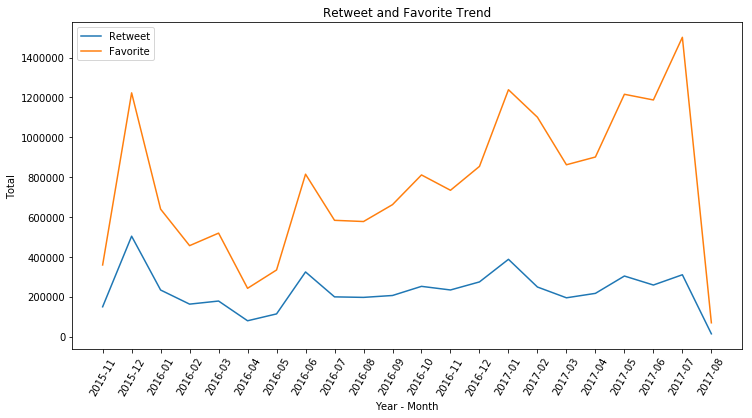

In [11]:
vals_retweet = df3.retweet_count.groupby([df3.timestamp.dt.year, df3.timestamp.dt.month]).sum().values
vals_fav = df3.favorite_count.groupby([df3.timestamp.dt.year, df3.timestamp.dt.month]).sum().values

plt.plot(idx, vals_retweet);
plt.plot(idx, vals_fav);

plt.xticks(idx, rotation=60)
plt.title("Retweet and Favorite Trend");
plt.xlabel("Year - Month");
plt.ylabel("Total");
plt.legend(('Retweet', 'Favorite'));
plt.savefig('retweet_fav_trend', bbox_inches='tight')